|                                     |                                      |
| ---                                 | ---                                  |
| <img src="http://drive.google.com/uc?export=view&id=1JzM1Jig5KAOCvU4tIf2t66B3gd1uy1rG" width=200px> |<img src="http://drive.google.com/uc?export=view&id=1kMibD1EUis_6bwFtFIOgvUg22zEdROns" width=200px>|

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# <font color='blue'> Table Of Contents </font>

## <font color='blue'> Trees </font>

## <font color='blue'> Binary Search trees </font>

## <font color='blue'> Searching in BST </font>

## <font color='blue'> Deletion in BST </font>

## <font color='blue'> Traversal Exercise in BST </font>

## <font color='blue'> Creation of BST using Pre/Post/Inorder </font>

## <font color='blue'> Source Code 

* Searching
* Deletion </font>


# <font color='blue'> Trees </font>

A tree consists of a set of nodes and a set of edges that connect pairs of nodes. A tree has the following properties:

- One node of the tree is designated as the root node.

- Every node n, except the root node, is connected by an edge from exactly one other node p, where p is the parent of n.

- A unique path traverses from the root to each node.

- If each node in the tree has a maximum of two children, we say that the tree is a binary tree.


# <font color='blue'> Binary Search Trees </font>

A binary search tree relies on the property that keys that are less than the parent are found in the left subtree, and keys that are greater than the parent are found in the right subtree.


Now that you know what a binary search tree is, we will look at how a binary search tree is constructed. The search tree in above figure represents the nodes that exist after we have inserted the following keys in the order shown: ***70,31,93,94,14,23,73***. 

- Since 70 was the first key inserted into the tree, it is the root. 
- Next, 31 is less than 70, so it becomes the left child of 70. 
- Next, 93 is greater than 70, so it becomes the right child of 70. 
- Now we have two levels of the tree filled, so the next key is going to be the left or right child of either 31 or 93. 
- Since 94 is greater than 70 and 93, it becomes the right child of 93. 
- Similarly 14 is less than 70 and 31, so it becomes the left child of 31.
- 23 is also less than 31, so it must be in the left subtree of 31. However, it is greater than 14, so it becomes the right child of 14.

#IMAGE


## <font color='blue'> **Binary Search Tree Implementation** </font>

## <font color='blue'> **Node Class** </font>

The Node class will contain the basic structure and data that any of the node will hold in the designed tree. 



In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.right = None
        self.left = None
        self.parent = None



### <font color='blue'> **BST class** </font>



In [ ]:
class BST:
    # Intitializing the Tree structure 
    def __init__(self):
        self.root = None


Now that we have the BST shell and the Node it is time to write the insert method that will allow us to build our binary search tree. The insert method is a method of the BST class. This method will check to see if the tree already has a root. If there is not a root then put will create a new Node and install it as the root of the tree. If a root node is already in place then put calls the private, recursive, to search the tree according to the following algorithm:

- Starting at the root of the tree, search the binary tree comparing the new key to the key in the current node. If the new key is less than the current node, search the left subtree. If the new key is greater than the current node, search the right subtree.

- When there is no left (or right) child to search, we have found the position in the tree where the new node should be installed.

- To add a node to the tree, create a new Node object and insert the object at the point discovered in the previous step.

In [ ]:
    def insert(self, n):
            y = None
            temp = self.root
            # Running the while loop to find the correct position for given node
            while temp != None:
                y = temp
                # Comparing values tod ecide if traversal should be done in left or right side
                if n.data < temp.data:
                    temp = temp.left
                else:
                    temp = temp.right

            n.parent = y
            # If there is no node in the tree
            if y == None: 
                self.root = n
            elif n.data < y.data:
                y.left = n
            else:
                y.right = n


Once the tree is constructed, the next task is to implement the retrieval of a value for a given key. The get method is even easier than the put method because it simply searches the tree recursively until it gets to a non-matching leaf node or finds a matching key. When a matching key is found, the value stored in the payload of the node is returned.

In [ ]:
    def search(self, value):
    
        temp = self.root
        # Running the while loop to find the correct position for given node
        while temp != None:

            # Comparing values tod ecide if traversal should be done in left or right side
            if value < temp.data:
                temp = temp.left
            elif value > temp.data:
                temp = temp.right
            else:
                print("Item is found in the Tree")
                return
        else:
            print("Item not available in the tree")
            return

Finally, we turn our attention to the most challenging method in the binary search tree, the deletion of a key. The first task is to find the node to delete by searching the tree. If the tree has more than one node then we search to find the Node that needs to be removed. If the tree only has a single node, that means we are removing the root of the tree, but we still must check to make sure the key of the root matches the key that is to be deleted. In either case if the key is not found the del operator raises an error.

In [ ]:
    # Method to find the minimum value in the tree
    def minimum(self, x):
        # Running while loop and going left side of the tree
        # Left side of subtree should contain element with lowest values
        while x.left != None:
            x = x.left
        return x
    
    def delete_helper(self, p, q):
        if p.parent == None:
            self.root = q
        elif p == p.parent.left:
            p.parent.left = q
        else:
            p.parent.right = q

        if q != None:
            q.parent = p.parent
            
    # Code to perform deletion over the BST
    def delete(self, z):
        if z.left == None:
            self.delete_helper(z, z.right)

        elif z.right == None:
            self.delete_helper(z, z.left)
        
        # Lets find the minimum in the right subtree (y). 
        # Now, we have to put this minimum node (y) in the place of z.
        else:
            y = self.minimum(z.right) #minimum element in right subtree
            #transplant the right of y to y and then 
            #take the right subtree of z and make it the right subtree of y.

            if y.parent != z:
                self.delete_helper(y, y.right)
                y.right = z.right
            y.right.parent = y

            self.delete_helper(z, y)
            y.left = z.left
            y.left.parent = y

In [ ]:
    def inorder(self, n):
            if n != None:
                self.inorder(n.left)
                print(n.data)
                self.inorder(n.right)

        def preorder(self, n):
            if n != None:
                print(n.data)
                self.preorder(n.left)
                self.preorder(n.right)

        def postorder(self, n):
            if n != None:
                self.postorder(n.left)
                self.postorder(n.right)
                print(n.data)

# <font color='blue'> Traversal exercise </font>

There are three types of traversals are possible in Binary trees. These traversal are known as: 

- Inorder 
- Preorder
- Postorder

**inorder**
- In an inorder traversal, we recursively do an inorder traversal on the left subtree, visit the root node, and finally do a recursive inorder traversal of the right subtree.

**preorder**

- In a preorder traversal, we visit the root node first, then recursively do a preorder traversal of the left subtree, followed by a recursive preorder traversal of the right subtree.

**postorder**
- In a postorder traversal, we recursively do a postorder traversal of the left subtree and the right subtree followed by a visit to the root node.

In [ ]:

def inorder(tree):
    if tree:
        inorder(tree.get_left_child())
        print(tree.get_root_val())
        inorder(tree.get_right_child())


def preorder(tree):
    if tree:
        print(tree.get_root_val())
        preorder(tree.get_left_child())
        preorder(tree.get_right_child())
        

        
def postorder(tree):
    if tree:
        postorder(tree.get_left_child())
        postorder(tree.get_right_child())
        print(tree.get_root_val())

Lets have a look at the examples and calculate the inorder, preorder and postorder of binary tree.  


1. 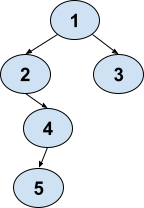

- Inorder- 
- Postorder-
- Preorder-

2. 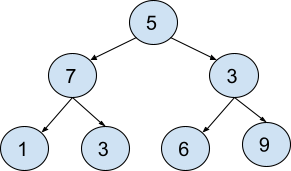

- Inorder- 
- Postorder-
- Preorder-

3. 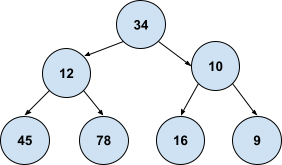

- Inorder- 
- Postorder-
- Preorder-

4. 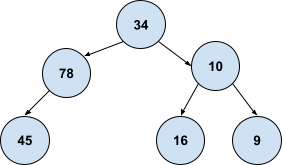

- Inorder- 
- Postorder-
- Preorder-

### <font color='blue'> Level Order Traversal </font>

We will be using Queue Data structure to implement level order traversal. 

In Level order traversals where Trees can also be traversed in level order, where we visit every node on a level before going to a lower level. This search is referred to as level order traversal as the search tree is broadened as much as possible on each depth before going to the next depth.

We will be using Queue data structure and its usage to implement this traversal. 


In [ ]:
class Queue:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def enqueue(self,item):
        self.items.insert(0, item)

    def dequeue(self):
        return self.items.pop()
    

In [ ]:
    
    def levelorder(self, root):
            if root is None:
                return
            else:
                q = Queue()
                q.enqueue(root)

                while(not q.isEmpty()):
                    root = q.dequeue()
                    print(root.data)

                    if(root.left is not None):
                        q.enqueue(root.left)

                    if(root.right is not None):
                        q.enqueue(root.right)

# <font color='blue'> Creation of Binary Tree using Preorder/Postorder/Inorder </font>

We can create the Binary Tree using Inorder and with either using preorder or postorder. In oder to understan dhow construction can happen for the Binary tree, lets have a look at the example.


- Inorder Traversal : { 40, 20, 11, 72, 51, 83, 32, 68 }

- Preorder Traversal: { 11, 20, 40, 32, 51, 72, 83, 68 }

Lets have a look at the output as the following tree.

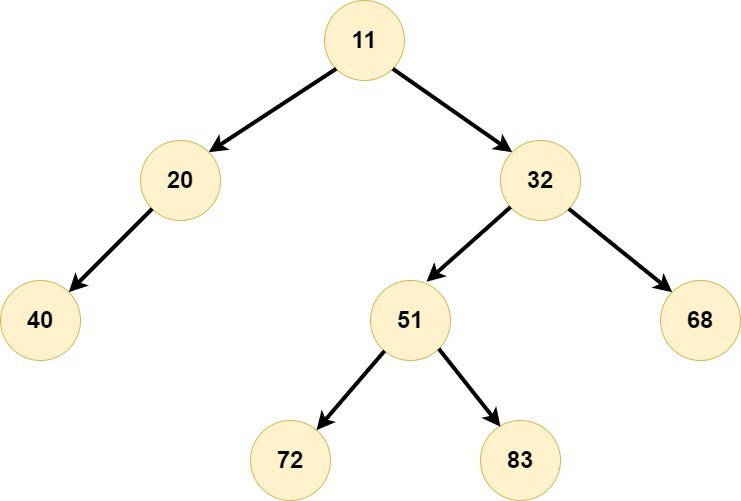



The idea is to start with the root node, which would be the first item in the preorder sequence, and find the boundary of its left and right subtree in the inorder sequence. 

To find the boundary, search for the index of the root node in the inorder sequence. All keys before the root node in the inorder sequence become part of the left subtree, and all keys after the root node become part of the right subtree. 

Repeat this recursively for all nodes in the tree and construct the tree in the process.

The root will be the first element in the preorder sequence, i.e., 11. Next, locate the index of the root node in the inorder sequence. Since 11 is the root node, all nodes before 11 in the inorder sequence must be included in the left subtree, i.e., {40, 20} and all the nodes after 11 must be included in the right subtree, i.e., {72, 51, 83, 32, 68}. Now the problem is reduced to building the left and right subtrees and linking them to the root node. The step should be implemented recirsively for each node. 

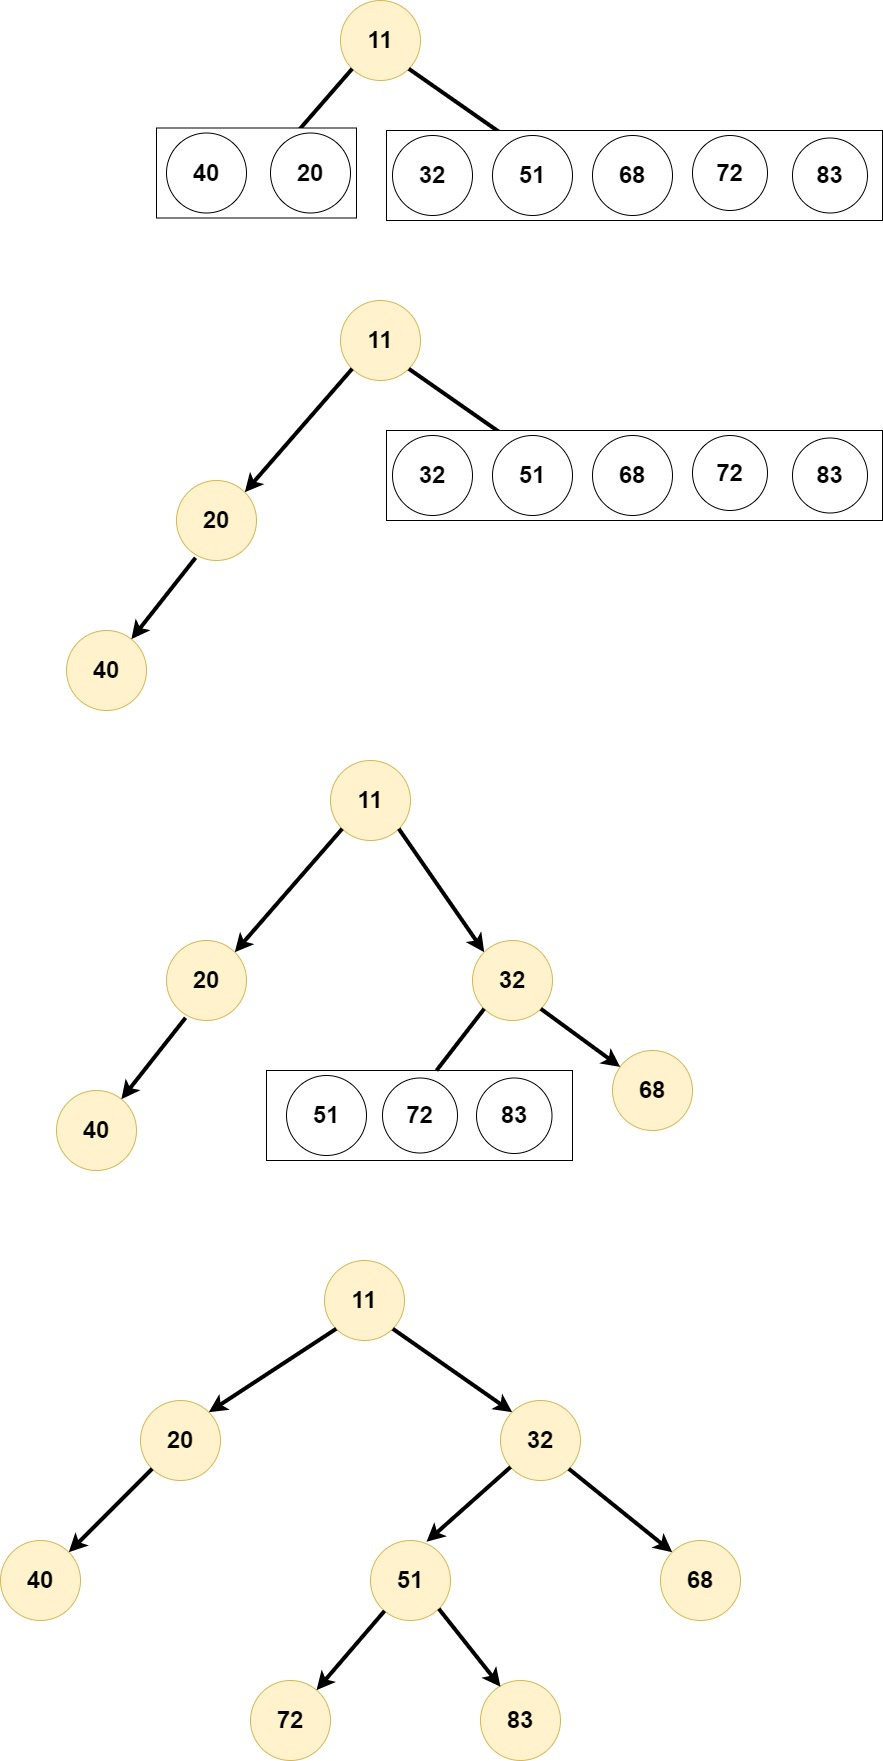


# <font color='blue'> Source Code </font>

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.right = None
        self.left = None
        self.parent = None

class Queue:
    def __init__(self):
        self.items = []

    def isEmpty(self):
        return self.items == []

    def enqueue(self,item):
        self.items.insert(0, item)

    def dequeue(self):
        return self.items.pop()

class BST:
    # Intitializing the Tree structure 
    def __init__(self):
        self.root = None
        
    # Method to find the minimum value in the tree
    def minimum(self, x):
        # Running while loop and going left side of the tree
        # Left side of subtree should contain element with lowest values
        while x.left != None:
            x = x.left
        return x

    def insert(self, n):
        y = None
        temp = self.root
        # Running the while loop to find the correct position for given node
        while temp != None:
            y = temp
            # Comparing values tod ecide if traversal should be done in left or right side
            if n.data < temp.data:
                temp = temp.left
            else:
                temp = temp.right

        n.parent = y
        # If there is no node in the tree
        if y == None: 
            self.root = n
        elif n.data < y.data:
            y.left = n
        else:
            y.right = n

    def search(self, value):
    
        temp = self.root
        # Running the while loop to find the correct position for given node
        while temp != None:

            # Comparing values tod ecide if traversal should be done in left or right side
            if value < temp.data:
                temp = temp.left
            elif value > temp.data:
                temp = temp.right
            else:
                print("Item is found in the Tree")
                return
        else:
            print("Item not available in the tree")
            return

    def inorder(self, n):
        if n != None:
            self.inorder(n.left)
            print(n.data)
            self.inorder(n.right)
    
    def preorder(self, n):
        if n != None:
            print(n.data)
            self.preorder(n.left)
            self.preorder(n.right)

    def postorder(self, n):
        if n != None:
            self.postorder(n.left)
            self.postorder(n.right)
            print(n.data)

    def delete_helper(self, p, q):
        if p.parent == None:
            self.root = q
        elif p == p.parent.left:
            p.parent.left = q
        else:
            p.parent.right = q

        if q != None:
            q.parent = p.parent
            
    # Code to perform deletion over the BST
    def delete(self, z):
        if z.left == None:
            self.delete_helper(z, z.right)

        elif z.right == None:
            self.delete_helper(z, z.left)
        
        # Lets find the minimum in the right subtree (y). 
        # Now, we have to put this minimum node (y) in the place of z.
        else:
            y = self.minimum(z.right) #minimum element in right subtree
            #transplant the right of y to y and then 
            #take the right subtree of z and make it the right subtree of y.

            if y.parent != z:
                self.delete_helper(y, y.right)
                y.right = z.right
            y.right.parent = y

            self.delete_helper(z, y)
            y.left = z.left
            y.left.parent = y


    def levelorder(self, root):
        if root is None:
            return
        else:
            q = Queue()
            q.enqueue(root)

            while(not q.isEmpty()):
                root = q.dequeue()
                print(root.data)

                if(root.left is not None):
                    q.enqueue(root.left)

                if(root.right is not None):
                    q.enqueue(root.right)


if __name__ == '__main__':

    t = BST()

    a = Node(100)
    b = Node(90)
    c = Node(110)
    d = Node(120)
    e = Node(80)
    f = Node(95)
    g = Node(70)
    h = Node(87)
    i = Node(113)
    j = Node(130)
    k = Node(23)
    l = Node(127)
    m = Node(140)

    t.insert(a)
    t.insert(b)
    t.insert(c)
    t.insert(d)
    t.insert(e)
    t.insert(f)
    t.insert(g)
    t.insert(h)
    t.insert(i)
    t.insert(j)
    t.insert(k)
    t.insert(l)
    t.insert(m)
    
    t.search(10)
    t.search(140)
    
    print("In Order")
    t.inorder(t.root)
    print("Preorder")
    t.preorder(t.root)
    print("Postorder")
    t.postorder(t.root)
    print("Level Order")
    t.levelorder(t.root)

Item not available in the tree
Item is found in the Tree
In Order
23
70
80
87
90
95
100
110
113
120
127
130
140
Preorder
100
90
80
70
23
87
95
110
120
113
130
127
140
Postorder
23
70
87
80
95
90
113
127
140
130
120
110
100
Level Order
100
90
110
80
95
120
70
87
113
130
23
127
140
